# Towards a Network-based Approach to Analyze Particle Swarm Optimizers

Here we are going to create most of the plots in:

> Oliveira, Marcos, Carmelo JA Bastos-Filho, and Ronaldo Menezes. "Towards a network-based approach to analyze particle swarm optimizers." Swarm Intelligence (SIS), 2014 IEEE Symposium on. IEEE, 2014.

```tex
@inproceedings{oliveira2014towards,
  title={Towards a network-based approach to analyze particle swarm optimizers},
  author={Oliveira, Marcos and Bastos-Filho, Carmelo JA and Menezes, Ronaldo},
  booktitle={Swarm Intelligence (SIS), 2014 IEEE Symposium on},
  pages={1--8},
  year={2014},
  organization={IEEE}
}
```

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import powerlaw
from swarm_analyzer import SwarmAnalyzer

For that, we create the influence graph of the swarm at the iteration 1000 using a time window of size 1000:

In [2]:
filename = './data/global_F06_15'
graph = SwarmAnalyzer.create_influence_graph(filename, window_size=1000, calculate_on=1000)

Nice, now we have a graph. Let's check the distribution of edges weight and graph strength.

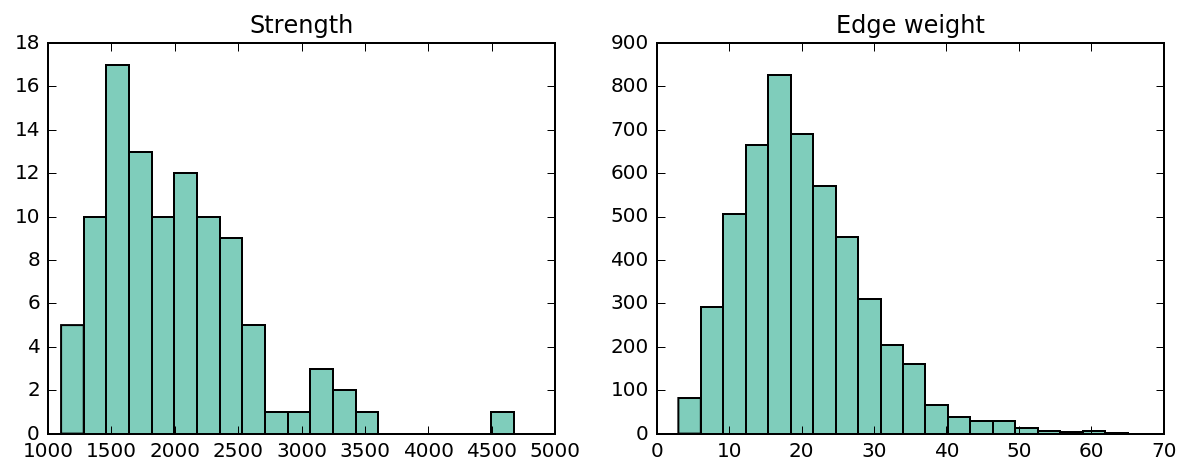

In [3]:
edge_weights = graph.es["weight"]
strength = graph.strength(weights='weight')
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.hist(strength, bins=20, color="#7fcdbb")
plt.title("Strength")
plt.subplot(1, 2, 2)
plt.hist(edge_weights, bins=20, color="#7fcdbb")
plt.title("Edge weight")
plt.show()

This is Fig. 6 in the paper (for global topology).

In [8]:
strength_fit = powerlaw.Fit(strength)
edge_weights_fit = powerlaw.Fit(edge_weights)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


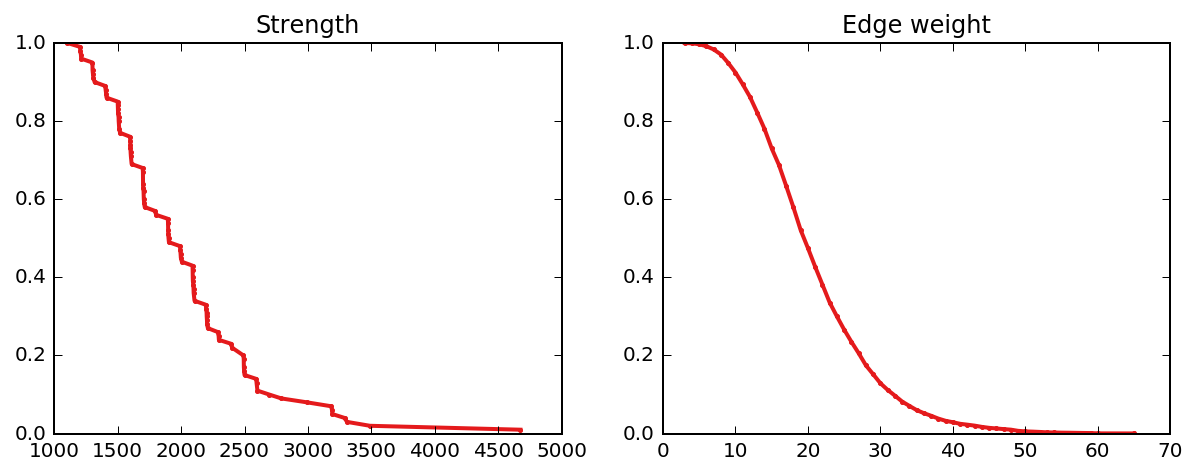

In [5]:
plt.figure(figsize=(10, 3.5))
ax = plt.subplot(1, 2, 1)
strength_fit.plot_ccdf(ax=ax, marker=".", ms=4, original_data=True, lw=2, color="#e41a1c")
plt.xscale("linear")
plt.yscale("linear")
plt.title("Strength")
ax = plt.subplot(1, 2, 2)
edge_weights_fit.plot_ccdf(ax=ax, marker=".", ms=4, original_data=True, lw=2, color="#e41a1c")
plt.xscale("linear")
plt.yscale("linear")
plt.title("Edge weight")
plt.show()

This is Fig. 7 in the paper (for global topology).

# Destroying graphs, constructing plots
Time to analyze how this graph is destroyed as we remove its edges.

In [6]:
filename = './data/ring_F06_15'
window_size = 1000
calculate_on = 1000
giant_component_destruction_curve_count = SwarmAnalyzer.get_giant_component_destruction_curves(filename, window_size, calculate_on=calculate_on, count='components')
giant_component_destruction_curve_size = SwarmAnalyzer.get_giant_component_destruction_curves(filename, window_size, calculate_on=calculate_on, count='size')

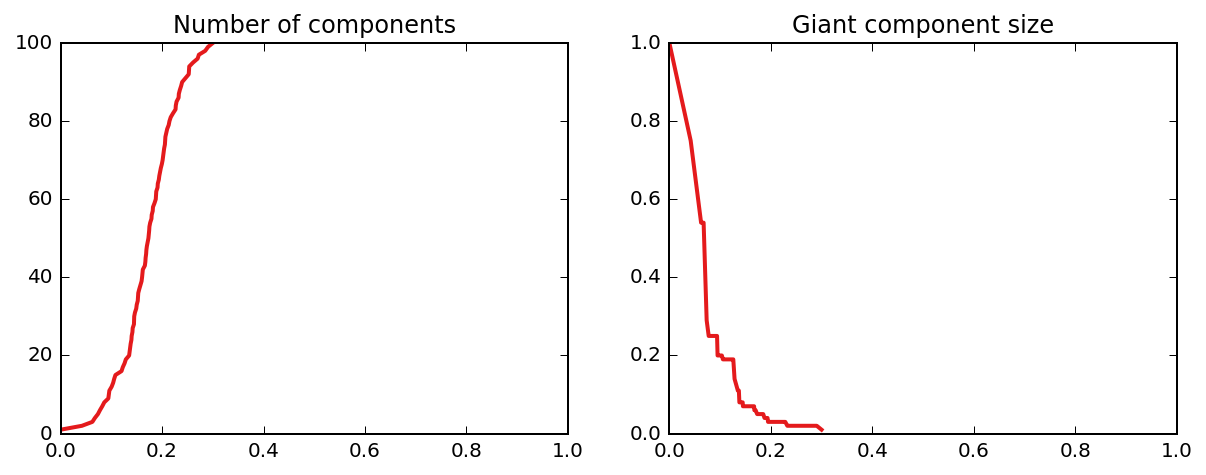

In [7]:
normalize = 2.*window_size
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.plot(giant_component_destruction_curve_count[0]['x']/normalize, giant_component_destruction_curve_count[0]['y'], lw=2, color="#e41a1c")
plt.title("Number of components")
plt.xlim(0, 1)
ax = plt.subplot(1, 2, 2)
plt.plot(giant_component_destruction_curve_size[0]['x']/normalize, giant_component_destruction_curve_size[0]['y'], lw=2., color="#e41a1c")
plt.title("Giant component size")
plt.xlim(0, 1)
plt.show()

This is Fig. 9 in the paper (for global topology).